# Examen A Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
# Primer punto. Optimización de funciones con `SymPy` (37 puntos)

**Costo mínimo**. Imagine dos contenedores cilíndricos sin tapa que deben satisfacer las siguientes condiciones:

- El primer contenedor tiene el doble de altura que el segundo.
- La altura del primer contenedor (el de mayor tamaño) es el doble de su radio.
- El material para la base cuesta 10.00 MXN por cada $m^2$.
- El material para los lados cuesta 6.00 MXN por cada $m^2$.

¿Cuál es el costo del contenedor más barato?


1. Escriba el volumen $V_1(r_1)$ y $V_2(r_2, r_1)$ de ambos contenedores como dos funciones distintas, donde $r_1$ es el radio del primer contenedor y $r_2$ es el radio del segundo. Realice este punto usando $\LaTeX$ y celdas *Markdown*.

$$ V_1(r1)= \pi r^2_1(2r_1)= 2 $$

$$ V_2(r_1,r_2)=\pi r^2_2 r_1 $$

2. Escriba el costo **C** de fabricar ambos contenedores como una función de los radios de las bases. Realice este punto usando $\LaTeX$ y celdas *Markdown*.

$$ C_1= 10 \pi r^2_1 + 6(2 \pi r_1 (2r_1) = 10 \pi r^2_1 + 24 \pi r^2_1 $$

$$ C_2= 10 \pi r^2_2 + 6(2 \pi r_2 (2r_1) = 10 \pi r^2_2 + 12 \pi r_1r_2 $$

$$ C_x = 10 \pi r^2_1 + 10 \pi r^2_2 + 24 \pi r^2_1 + 12 \pi r_1r_2 $$

3. Determina las dimensiones de los contenedores si el volumen del contenedor pequeño debe ser de $12m^3$ y el costo debe ser mínimo.

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sp.var("x")
sp.var("y")

v2 = sp.pi * y**2 * x - 12

xdesp = sp.solve(v2, x)[0]
xdesp

12/(pi*y**2)

In [3]:
ct = (10 * sp.pi * x**2) + (10 * sp.pi * y**2) + (24 * sp.pi * x**2) + (12 * sp.pi * x * y)

ct_remp = ct.subs(x, xdesp)
ct_remp

10*pi*y**2 + 144/y + 4896/(pi*y**4)

In [4]:
def ct(y):
    return (10 * sp.pi * y**2) + (144 / y) + (4896 / (sp.pi * y**4))

dct = sp.diff(ct(y), y)
dct

20*pi*y - 144/y**2 - 19584/(pi*y**5)

In [5]:
pc = sp.solve(dct, y)

len(pc)

6

In [6]:
pc[0]

-5**(2/3)*(-18 + 6*sqrt(689))**(1/3)/(5*pi**(1/3))

In [7]:
pc[1]

5**(2/3)*(18 + 6*sqrt(689))**(1/3)/(5*pi**(1/3))

In [8]:
pc[2]

5**(2/3)*(-18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)) - sqrt(3)*5**(2/3)*I*(-18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3))

In [9]:
pc[3]

5**(2/3)*(-18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)) + sqrt(3)*5**(2/3)*I*(-18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3))

In [10]:
pc[4]

-5**(2/3)*(18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)) - sqrt(3)*5**(2/3)*I*(18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3))

In [11]:
pc[5]

-5**(2/3)*(18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)) + sqrt(3)*5**(2/3)*I*(18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3))

El que sirve

In [13]:
pc[1]

5**(2/3)*(18 + 6*sqrt(689))**(1/3)/(5*pi**(1/3))

In [14]:
print("La medida de r2 es: ", float(pc[1]))

La medida de r2 es:  2.235526671726874


In [15]:
print("La medida de r1 es: ", float(xdesp.subs(y, pc[1])))

La medida de r1 es:  0.7643137311179903


In [16]:
print("El costo total de fabricar los contenedores es de:\n $", float(ct_remp.subs(y, pc[1])))

El costo total de fabricar los contenedores es de:
 $ 283.8161489938861


3. ¿Cuál fue el costo de fabricar este par de contenedores?

---
# Segundo punto. Programación lineal (37 puntos)

Una empresa se dedica a fabricar tarjetas de control para automóviles, y están en su momento de planeación de compras anuales. Hay 5 proveedores que pueden proveer los componentes, cada uno a su propio precio.

<table>
  <tr>
      <th>  </th>
      <th>Proveedor 1</th>
      <th>Proveedor 2</th>
      <th>Proveedor 3</th>
      <th>Demanda</th>
  </tr>
  <tr>
      <th>Componente 1</th>
      <td>0.5</td>
      <td>0.6</td>
      <td>0.7</td>
      <td>15000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 2</th>
      <td>0.7</td>
      <td>0.5</td>
      <td>0.6</td>
      <td>20000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 3</th>
      <td>0.32</td>
      <td>0.54</td>
      <td>0.8</td>
      <td>12000</td>
  </tr>

  <tr style="border-bottom: 1px solid #000;">
      <th>Capacidad</th>
      <td> 21000 </td>
      <td> 16000 </td>
      <td> 16000 </td>
      <td>  </td>
  </tr>
</table>

El proveedor tiene restricciones de capacidad de fabricación del tipo de componentes, por lo que un proveedor no puede satisfacer nuestra demanda completa para cada componente.

Se desea conocer la cantidad que se debe comprar de cada componente a cada proveedor para gastar la menor cantidad de dinero posible, pero al mismo tiempo lograr satisfacer la demanda para poder continuar con la manufactura del producto.

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(23 puntos)}
\end{equation}

#### Componente 1 #### 

$ 0.5x1 + 0.6x2 + 0.7x3 +0x4 + 0x5 + 0x6 + 0x7 + 0x8 + 0x9 \geq 15000 $

#### Componente 2 #### 

$ 0x1 + 0x2 + 0x3 +0.7x4 + 0.5x5 + 0.6x6 + 0x7 + 0x8 + 0x9 \geq 20000 $

#### Componente 3 #### 

$ 0x1 + 0x2 + 0x3 +0x4 + 0x5 + 0x6 + 0.32x7 + 0.54x8 + 0.8x9 \geq 12000 $

#### Proveedor 1 #### 

$ 0.5x1 + 0x2 + 0x3 +0.7x4 + 0x5 + 0x6 + 0.32x7 + 0x8 + 0x9 \leq 21000 $

#### Proveedor 2 #### 

$ 0x1 + 0.6x2 + 0x3 +0x4 + 0.5x5 + 0x6 + 0x7 + 0.54x8 + 0x9 \leq 16000 $

#### Proveedor 3 #### 

$ 0x1 + 0x2 + 0.7x3 +0x4 + 0x5 + 0.6x6 + 0x7 + 0x8 + 0.8x9 \leq 16000 $

#### La función objetivo será: ####
$$\min_{x_1,\dots,x_6}0.5x_1 + 0.6x_2 + 0.7x_3 + 0.7x_4 + 0.5x_5 + 0.6x_6 + 0.32x_7 + 0.54x_8 + 0.8x_9$$

#### Función de costos
$ C= 0.5x_1 + 0.6x_2 + 0.7x_3 + 0.7x_4 + 0.5x_5 + 0.6x_6 + 0.32x_7 + 0.54x_8 + 0.8x_9 = 15000 + 20000 + 12000 $

2. Resuelva el problema utilizando la función `linprog`. ¿Cómo debe ser la distribución de compras? ¿Cuánto dinero se necesita para satisfacer la demanda? (10 puntos)

In [19]:
import scipy.optimize as opt
import numpy as np
c = np.array([0.5,0.6,0.7,0.7,0.5,0.6,0.32,0.54,0.8])
Aub = np.array([
    [-0.5, -0.6, -0.7, -0, -0, -0, -0, -0, -0],
    [-0, -0, -0, -0.7, -0.5, -0.6, -0, -0, -0],
    [-0, -0, -0, -0, -0, -0, -0.32, -0.54, -0.8],
    [-0.5, -0, -0, -0.7, -0, -0, -0.32, -0, -0],
    [-0, -0.6, -0, -0, -0.5, -0, -0, -0.54, -0],
    [-0, -0, -0.7, -0, -0, -0.6, -0, -0, -0.8],
])
bub = np.array([
    -15000,
    -20000,
    -12000,
    21000,
    16000,
    16000,
])
sol = opt.linprog(c, Aub, bub)
print("Costo mínimo total:", sol.fun)
print("Compra óptima de componentes", "\n", sol.x)

Costo mínimo total: 47000.0
Compra óptima de componentes 
 [30000.             0.             0.         28571.42857143
     0.             0.         37500.             0.
     0.        ]


# Tercer punto. Ajuste de curvas (36 puntos)

Utiliza el archivo adjunto en Canvas en el apartado que corresponde al examen.

Escribe tu número de expediente: 

Lee el archivo y extrae la siguiente información:
- $x$ es la primer columna del archivo
- $y$ es la columna correspondiente a los últimos dos dígitos de tu número de expediente + 1. E.g. mi expediente es $693871$; por lo tanto, debo usar la columna $72$.

In [20]:
import pandas as pd
data = pd.read_excel("E01-RegresionLineal.xlsx")
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.000000,4.983091,3.769339,5.594828,6.429803,4.511528,6.706383,2.911751,-2.864652,-3.093433,...,6.667738,5.885562,-2.052453,-2.984045,5.750429,2.135754,-1.234049,3.500585,3.206284,-2.015092
1,0.002002,3.614394,2.396633,4.225133,5.058559,3.141485,5.346220,1.538843,-4.236502,-4.464649,...,5.312463,4.525002,-3.410375,-4.346935,4.396159,0.773647,-2.607035,2.130640,1.840478,-3.376963
2,0.004004,4.188195,2.966396,4.797931,5.629813,3.713902,5.928572,2.108423,-3.665847,-3.893386,...,5.899704,5.106895,-2.825807,-3.767381,4.984377,1.354042,-2.037531,2.703165,2.417138,-2.796368
3,0.006006,5.445592,4.219727,6.054320,6.884664,4.969878,7.194535,3.361588,-2.411586,-2.638543,...,7.170558,6.372337,-1.557653,-2.504284,6.256181,2.618039,-0.784438,3.959257,3.677362,-1.532206
4,0.008008,5.067521,3.837561,5.675236,6.504048,4.590350,6.825046,2.979275,-2.792786,-3.019186,...,6.805961,6.002265,-1.924977,-2.876709,5.892506,2.246572,-1.166821,3.579851,3.302087,-1.903542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.991992,-37.621743,-26.216957,2.179613,34.525805,-81.587062,44.262737,22.788572,58.082286,-69.526880,...,-57.907315,-30.282534,2.509291,-114.436776,14.101042,109.678623,11.649459,0.666863,27.882475,93.843512
996,1.993994,-38.413531,-26.940495,1.526510,34.067619,-82.481098,43.789529,22.302350,57.727557,-70.383159,...,-58.823098,-31.021199,1.898045,-115.441524,13.503160,109.438779,11.124500,0.086051,27.430621,93.598580
997,1.995996,-38.302053,-26.760562,1.777022,34.513839,-82.472001,44.220604,22.720442,58.277463,-70.336305,...,-58.835998,-30.856352,2.190637,-115.543472,13.809172,110.103751,11.503708,0.409258,27.883253,94.258542
998,1.997998,-39.725567,-28.115414,0.492894,33.426211,-83.998028,43.117706,21.604596,57.293749,-71.824574,...,-60.384272,-32.226251,0.948811,-117.180880,12.580823,109.235287,10.348831,-0.801770,26.802116,93.385145


In [21]:
x = data[0].values
y = data[72].values

1. Ajuste los datos con polinomios de grados 1, 3, y 5. Muestre los errores de forma gráfica. ¿Qué polinomio se ajusta mejor?

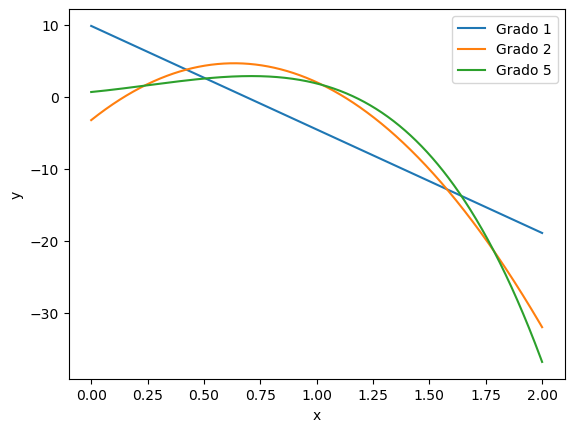

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

grados = [1, 2, 5]
modelos = {}

for grado in grados:
    poly = PolynomialFeatures(degree = grado)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    modelo = LinearRegression()
    modelo.fit(X_poly, y)
    
    Nacimientos_pred = modelo.predict(X_poly)
    plt.plot(x, Nacimientos_pred, label=f'Grado {grado}')
    
    if grado == 1:
        X_poly_simple = X_poly[:, 1:]

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [23]:
import scipy.optimize as opt
import numpy as np
start = min(data[72])
x = np.array(data[0]) - start
y = np.array(data[72])

# y = b0 + b1*x

m = len(y)
beta = np.random.rand(2)
ones = np.ones([m, 1])
x_factor = np.reshape(x, [m, 1])
X = np.hstack( (ones, x_factor) )
y_vector = np.reshape(y, [m, 1])

# y = b0 + b1*x + b2*x**2
beta2 = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack( (ones, x_factor, x2_factor) )


# y = b0 + b1*x + b2*x**3
beta3 = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x_factor, x2_factor, x3_factor) )

# y = b0 + b1*x + b2*x**3
beta4 = np.random.rand(5)
x4_factor = np.reshape(x**4, [m, 1])
X4 = np.hstack( (ones, x_factor, x2_factor, x3_factor, x4_factor) )

# y = b0 + b1*x + b2*x**3
beta5 = np.random.rand(6)
x5_factor = np.reshape(x**5, [m, 1])
X5 = np.hstack( (ones, x_factor, x2_factor, x3_factor, x4_factor, x5_factor) )

# y = b0 + b1*x + b2*x**3
beta6 = np.random.rand(4)
x6_factor = np.reshape(x**3, [m, 1])
X6 = np.hstack( (ones, x_factor, x2_factor, x3_factor, x4_factor, x5_factor, x6_factor) )

def funcion_de_costo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

In [24]:
sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))
sol3 = opt.minimize(funcion_de_costo, beta3, args=(X3, y_vector))
sol5 = opt.minimize(funcion_de_costo, beta5, args=(X5, y_vector))

In [25]:
sol1

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 38217.11378805164
        x: [ 5.578e+02 -1.439e+01]
      nit: 7
      jac: [ 3.418e-03  1.538e-01]
 hess_inv: [[ 2.108e+00 -5.392e-02]
            [-5.392e-02  1.380e-03]]
     nfev: 120
     njev: 36

In [26]:
sol3

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 4553.83436913573
        x: [ 3.357e+03 -1.082e+03  4.921e+01 -6.066e-01]
      nit: 12
      jac: [ 6.839e+01  1.717e+03  2.944e+04 -2.857e+05]
 hess_inv: [[ 1.085e+00  7.900e-01 -4.247e-02  5.512e-04]
            [ 7.900e-01  7.924e+00 -4.067e-01  5.204e-03]
            [-4.247e-02 -4.067e-01  2.088e-02 -2.672e-04]
            [ 5.512e-04  5.204e-03 -2.672e-04  3.419e-06]]
     nfev: 297
     njev: 57

In [27]:
sol5

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 2201816843.2982974
        x: [ 2.216e+03 -3.742e+03  7.429e+03 -6.202e+02  1.736e+01
            -1.609e-01]
      nit: 29
      jac: [-3.594e+05 -1.253e+07 -4.310e+08 -1.457e+10 -4.813e+11
            -1.527e+13]
 hess_inv: [[ 2.108e-04  1.873e-03 ... -4.081e-06  3.030e-08]
            [ 1.873e-03  1.679e-02 ... -3.597e-05  2.639e-07]
            ...
            [-4.081e-06 -3.597e-05 ...  8.022e-08 -6.056e-10]
            [ 3.030e-08  2.639e-07 ... -6.056e-10  4.661e-12]]
     nfev: 522
     njev: 73

2. Muestre en un gráfico los datos y el polinomio que mejor se ajuste.

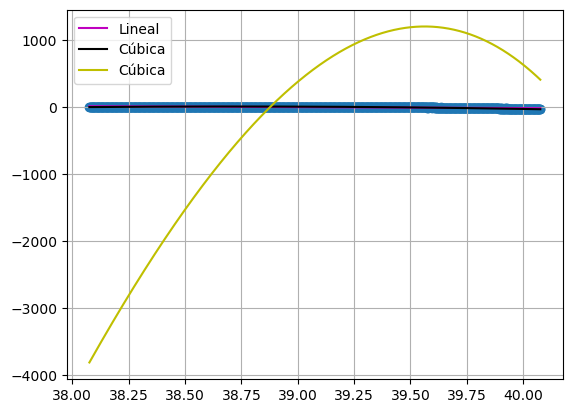

In [28]:
plt.figure()
plt.grid()
plt.scatter(x, y)
plt.plot(x, X @ np.reshape(sol1.x, [2, 1]), "m" ,label="Lineal")
plt.plot(x, X3 @ np.reshape(sol3.x, [4, 1]), "k", label="Cúbica")
plt.plot(x, X5 @ np.reshape(sol5.x, [6, 1]), "y", label="Cúbica")
plt.legend(loc = "best")

<BarContainer object of 3 artists>

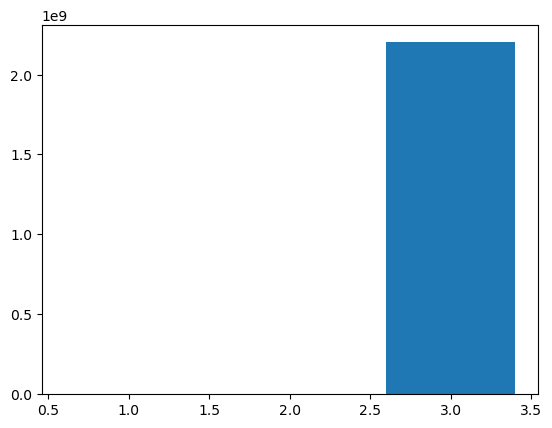

In [29]:
plt.figure()
plt.bar([1, 2, 3], [sol1.fun, sol3.fun, sol5.fun])

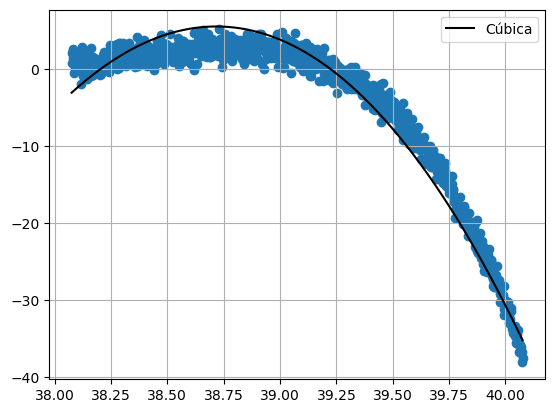

In [30]:
plt.figure()
plt.grid()
plt.scatter(x, y)
plt.plot(x, X3 @ np.reshape(sol3.x, [4, 1]), "k", label="Cúbica")
plt.legend(loc = "best")

3. Use el modelo para averiguar el valor de $y$ cuando:
- $x=0.001$
- $x=-0.1$
- $x=2.1$

In [31]:
def f(x):
    return 3.264 + 2.592*x - 13.0*x**2 + 12.72*x**3

In [32]:
f(0.001)

3.26657901272

In [33]:
f(-0.1)

2.86208

In [34]:
f(2.1)

69.17712000000002

4. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación?

En la extrapolación ($x=2.1$), efectivamente arroja un valor mas alto, respetanto la curva a la alza. En la interpolación, también arroja un resultado que se ve en el promedio del los datos para esa zona por lo que se puede concluír que las predicciones estan cerca de los datos reales.

5. Agregue un factor $\cos{(10x)}$ a su modelo y grafique los resultados. ¿Mejoró el resultado?

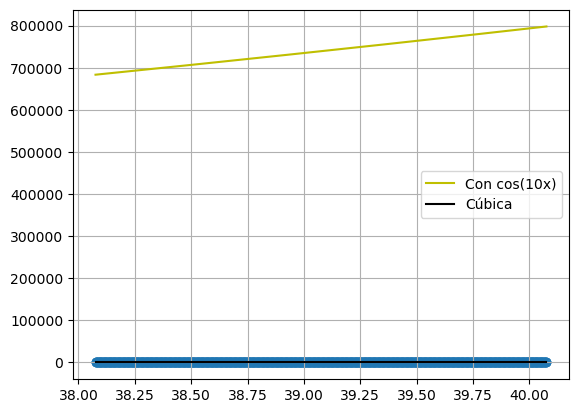

In [35]:
def f(x):
    return 3.264 + 2.592*x - 13.0*x**2 + 12.72*x**3 + np.cos(10*x)

plt.figure()
plt.grid()
plt.scatter(x, y,)
plt.plot(x, f(x), "y", label="Con cos(10x)")
plt.plot(x, X3 @ np.reshape(sol3.x, [4, 1]), "k", label="Cúbica")
plt.legend(loc = "best")

In [36]:
f(0.001)

4.266529013136665

In [37]:
f(-0.1)

3.40238230586814

In [38]:
f(2.1)

68.62939073977574